In [4]:
# Our usual data science tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy as sp # other science tools
# statsmodels -- "traditional" statistical models
# scikit-learn -- machine learning models
import seaborn as sns
import matplotlib.ticker as ticker
import time
import bs4
from bs4 import BeautifulSoup
#from plotnine import *

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache
from urllib.request import Request, urlopen

requests_cache.install_cache("mycache")

# Scrape eBay

In [416]:
ebay_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=used+cars&_sacat=6001&LH_BIN=1&_fsrp=1&rt=nc&_udhi=23999&_pgn=1"
def extract_all_links(url):
    """The input for this function is ebay website, and the output of this function 
    is all the posts's links in the page"""
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)

    html

    links = html.xpath("//a[contains(@class,'s-item__link')]/@href")
    next_page = html.xpath("//a[contains(@rel,'next')]/@href")
    return list(set(links)), next_page

links, next_page = extract_all_links(ebay_url)

In [417]:
next_page = next_page[0]
i = 0
# a while loop that scrape 355 page of ebay links
while i < 355:
    link, next_pages = extract_all_links(next_page)
    next_page = next_pages[0]
    links = links + link
    i+=1
# the reason we put 355 is page 355 is the max number of page in ebay website

In [102]:
def get_article_info(url):
    """Request information of a article from a newspaper website, 
    the input should be a newspaper article link, and the output
    will be a dictionary of article information"""

    txt = ''
    # set a empty string
    link = url
    # set link to the url put in
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    response.raise_for_status()
    htmls = lx.fromstring(response.text)
    htmls.make_links_absolute(url)
    

#Find name
    try: 
        title = htmls.xpath("//h1[contains(@class, 'it-ttl')]/text()")
        title = title[0]
    except:
        title = np.nan

#Find note
    try: 
        note = htmls.xpath("//td[contains(@class, 'sellerNotesContent')]/span[contains(@class, 'viSNotesCnt')]/text()")
        note = note[0]
        note = note.lower()
    except:
        note = np.nan     

#Find time_left
    try: 
        time_left = htmls.xpath("//span[contains(@id, 'vi-cdown_timeLeft')]/text()")
        time_left = time_left[0]
        time_left = ' '.join(time_left.split())
    except:
        time_left = np.nan 
        
#Find bids
    try: 
        bids = htmls.xpath("//a[contains(@class, 'vi-bidC')]/span[@id = 'qty-test']/text()")
        bids = bids[0]
    except:
        bids = np.nan 
        
#Find bid_price
    try: 
        bid_price = htmls.xpath("//span[@class = 'notranslate' and @id = 'prcIsum_bidPrice']/text()")
        bid_price = bid_price[0]
    except:
        bid_price = np.nan 
        
        
#Find options
    try: 
        options = htmls.xpath("//td[preceding::td[contains(text(),'Power Options:')]]/span/text()")
        options = options[0]  
        options = option.lower()
    except:
        options = np.nan

#Find Price
    try: 
        price = htmls.xpath("//span[@class = 'notranslate' and @id = 'prcIsum']/text()")
        price = price[0]    
    except:
        price = np.nan
#Find Year
    try: 
        year = htmls.xpath("//td[preceding::td[contains(text(),'Year:')]]/span/text()")
        year = year[0]    
    except:
        year = np.nan
#Find Mileage
    try: 
        mileage = htmls.xpath("//td[preceding::td[contains(text(),'Mileage:')]]/span/text()")
        mileage = mileage[0]    
    except:
        mileage = np.nan
#Find Make
    try: 
        make = htmls.xpath("//td[preceding::td[contains(text(),'Make:')]]/span/text()")
        make = make[0]    
    except:
        make = np.nan
#Find Model
    try: 
        model = htmls.xpath("//td[preceding::td[contains(text(),'Model:')]]/h2/text()")
        model = model[0]    
    except:
        model = np.nan
#Find Body Type
    try: 
        body_type = htmls.xpath("//td[preceding::td[contains(text(),'Body Type:')]]/span/text()")
        body_type = body_type[0]    
    except:
        body_type = np.nan
#Find Engine
    try: 
        engine = htmls.xpath("//td[preceding::td[contains(text(),'Engine:')]]/span/text()")
        engine = engine[0]    
    except:
        engine = np.nan
#Find Fuel
    try: 
        fuel = htmls.xpath("//td[preceding::td[contains(text(),'Fuel Type:')]]/span/text()")
        fuel = fuel[0] 
        if fuel =='Gas'or fuel == 'Gasoline Fuel'or fuel == 'GASOLINE':
            fuel = 'Gasoline'
        if fuel =='C85':
            fule = 'Flex Fuel Vehicles'
        
    except:
        fuel = np.nan
#Find Transmission
    try: 
        transmission = htmls.xpath("//td[preceding::td[contains(text(),'Transmission:')]]/span/text()")
        transmission = transmission[0]    
        transmission = transmission.lower()
    except:
        transmission = np.nan
#Find Color
    try: 
        color = htmls.xpath("//td[preceding::td[contains(text(),'Exterior Color:')]]/span/text()")
        color = color[0] 
        color = color.lower()
    except:
        color = np.nan
 
    total = {"url":link,"title":title,'note':note,'make':make, 'model':model,'engine':engine,'price': price ,'year':year, 'mileage':mileage,
                 'transmission':transmission ,'bid_price':bid_price,'time_left':time_left,'bids':bids,'options':options,'body_type':body_type, 'color':color, 'Fuel_type':fuel  }
    # create a dictionary and put in all the information found of the article
    return total

In [45]:
get_article_info('https://www.ebay.com/itm/2005-Toyota-Avalon-Touring/163575926081?hash=item2615e28d41:g:85IAAOSwOwNce5Fh')
# try one specfic post


{'url': 'https://www.ebay.com/itm/2005-Toyota-Avalon-Touring/163575926081?hash=item2615e28d41:g:85IAAOSwOwNce5Fh',
 'title': '2005 Toyota Avalon Touring',
 'note': nan,
 'make': 'Toyota',
 'model': 'Avalon',
 'engine': '3.5L',
 'price': 'US $5,000.00',
 'year': '2005',
 'mileage': '183000',
 'transmission': 'Automatic',
 'bid_price': nan,
 'time_left': '22d 10h',
 'bids': nan,
 'options': nan,
 'body_type': 'Sedan',
 'color': 'black',
 'Fuel_type': 'Gasoline'}

In [104]:
info = pd.DataFrame([get_article_info(x) for x in links])
#find all the information of car in all the links

In [ ]:
# To get more data and circumvent the limit of ebay page.
# We scrape cars that are lower than $24000 into info1 and cars that are higher than
#than #24000 into info2 and save both into cvs 
# Directly read info1 and info2 cvs locally and combine them 

# Scrape Craigslist

In [ ]:
start_url = "https://lasvegas.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url1 = "https://modesto.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url2 = "https://bakersfield.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url3 = "https://fresno.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url4 = "https://goldcountry.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url5 = "https://hanford.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url6 = "https://inlandempire.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url7 = "https://imperial.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url8 = "https://losangeles.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url9 = "https://orangecounty.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url10 = "https://palmsprings.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url11 = "https://sandiego.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url12 = "https://santabarbara.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url13 = "https://slo.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url14 = "https://santamaria.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url15 = "https://sfbay.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url16 = "https://stockton.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url17 = "https://siskiyou.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url18 = "https://yubasutter.craigslist.org/search/cta?min_price=1&max_price=999999"
start_url19 = "https://susanville.craigslist.org/search/cta?min_price=1&max_price=999999"

def scrape_front_page(url):
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)

    html

        
    links = html.xpath("//a[contains(@class, 'result-title')]/@href")
    prices = html.xpath("//span[contains(@class, 'result-meta')]/span[contains(@class, 'result-price')]/text()")
    next_page = html.xpath("//a[contains(@class, 'next')]/@href")[0]
    
    return next_page, prices, links

next_page, prices, links = scrape_front_page("https://susanville.craigslist.org/search/cta?min_price=1&max_price=999999")
scrape_front_page(next_page)

In [ ]:
lists = ["https://lasvegas.craigslist.org/search/cta?min_price=1&max_price=999999","https://modesto.craigslist.org/search/cta?min_price=1&max_price=999999"]
lists.append(start_url2)
lists.append(start_url3)
lists.append(start_url4)
lists.append(start_url5)
lists.append(start_url6)
lists.append(start_url7)
lists.append(start_url8)
lists.append(start_url9)
lists.append(start_url10)
lists.append(start_url11)
lists.append(start_url12)
lists.append(start_url13)
lists.append(start_url14)
lists.append(start_url15)
lists.append(start_url16)
lists.append(start_url17)
lists.append(start_url18)
lists.append(start_url19)

In [ ]:
i = 0
j = 0
while i < 20:
    next_page = lists[i]
    while j < 25:
        next_page, price, link = scrape_front_page(next_page)
        links = links + link
        prices = prices + price
        j+=1
        print(next_page)
    j = 0
    i+=1
    print(i)

In [ ]:
temp_df = pd.DataFrame(links)
temp_df['price'] = pd.DataFrame(prices)
temp_df = temp_df.rename(columns={0:"links"})
temp_df.drop_duplicates('links', inplace = True)
temp_df = temp_df.reset_index()
temp_df

In [ ]:
unique_links = set(links)
unique_links = list(unique_links)
first_links = unique_links[0:10000]
second_links = unique_links[0:10000]
third_links = unique_links[0:10000]
forth_links = unique_links[0:10000]
fifth_links = unique_links[0:10000]

In [ ]:
def scrape_one_post(link):
    response = requests.get(link)
    try:
        response.raise_for_status()
    except:
        print("The url couldn't be downloaded!")

    html = lx.fromstring(response.text)

    
    try:
        title = html.xpath("//span[@id = 'titletextonly']/text()")
        title = title[0]
    except IndexError:
        title = None    
        
    try:
        cartitle = html.xpath("//span/b/text()")
        cartitle = cartitle[0]
    except IndexError:
        cartitle = None    
        
    try:
        drive = html.xpath("//span[text() = 'drive: ']/b/text()")
        drive = drive[0]
    except IndexError:
        drive = None    
        
    try:
        fuel = html.xpath("//span[text() = 'fuel: ']/b/text()")
        fuel = fuel[0]
    except IndexError:
        fuel = None        
        
    try:
        odometer = html.xpath("//span[text() = 'odometer: ']/b/text()")
        odometer = odometer[0]
    except IndexError:
        odometer = None        
        
    try:
        transmission = html.xpath("//span[text() = 'transmission: ']/b/text()")
        transmission = transmission[0]
    except IndexError:
        transmission = None        
        
    try:
        typetype = html.xpath("//span[text() = 'type: ']/b/text()")
        typetype = typetype[0]
    except IndexError:
        typetype = None        
        
    try:
        status = html.xpath("//span[text() = 'title status: ']/b/text()")
        status = status[0]
    except IndexError:
        status = None              
        
    try:
        size = html.xpath("//span[text() = 'size: ']/b/text()")
        size = size[0]
    except IndexError:
        size = None              
        
    try:
        condition = html.xpath("//span[text() = 'condition: ']/b/text()")
        condition = condition[0]
    except IndexError:
        condition = None              
        
    try:
        cylinders = html.xpath("//span[text() = 'cylinders: ']/b/text()")
        cylinders = cylinders[0]
    except IndexError:
        cylinders = None              

#  The text part is too messy, and only very few posts contains the following parts        
#     try:
#         Year = html.xpath("//section/text()[preceding-sibling::b[text() = 'Year:']]")
#         Year = Year[0]
#     except IndexError:
#         Year = None                    
        
#     try:
#         Make = html.xpath("//section/text()[preceding-sibling::b[text() = 'Make:']]")
#         Make = Make[0]
#     except IndexError:
#         Make = None                    
        
#     try:
#         Model = html.xpath("//section/text()[preceding-sibling::b[text() = 'Model:']]")
#         Model = Model[0]
#     except IndexError:
#         Model = None                    
        
#     try:
#         Engine = html.xpath("//section/text()[preceding-sibling::b[text() = 'Engine:']]")
#         Engine = Engine[0]
#     except IndexError:
#         Engine = None                    
        
#     try:
#         Body = html.xpath("//section/text()[preceding-sibling::b[text() = 'Body:']]")
#         Body = Body[0]
#     except IndexError:
#         Body = None                    
        
    try:
        text = html.xpath("//section[@id = 'postingbody']")[0]
        text = text.text_content()
    except IndexError:
        text = None                    
        
    try:
        longitude = html.xpath("//div[@id = 'map']/@data-longitude")
        longitude = longitude[0]
    except IndexError:
        longitude = None                       
        
    try:
        latitude = html.xpath("//div[@id = 'map']/@data-latitude")
        latitude = latitude[0]
    except IndexError:
        latitude = None   

    return {"url" : link,"title": title, "cartitle": cartitle, "drive": drive, "fuel": fuel, "odometer": odometer,
                "transmission": transmission,"typetype": typetype, "status": status, "size": size, "condition": condition,
                "cylinders": cylinders, "text":text, "longitude":longitude, "latitude":latitude}

In [ ]:
first_info = pd.DataFrame([scrape_one_post(x) for x in first_links])
first_info.to_csv("first_info.csv")

second_info = pd.DataFrame([scrape_one_post(x) for x in second_links])
second_info.to_csv("second_info.csv")

third_info = pd.DataFrame([scrape_one_post(x) for x in third_links])
third_info.to_csv("third_info.csv")

forth_info = pd.DataFrame([scrape_one_post(x) for x in forth_links])
forth_info.to_csv("forth_info.csv")

fifth_info = pd.DataFrame([scrape_one_post(x) for x in fifth_links])
fifth_info.to_csv("fifth_info.csv")


# Clean eBay

In [5]:
info1 = pd.read_csv("info_part1.csv")
info2 = pd.read_csv("info_part2.csv")
info =  pd.concat([info1, info2])
info = info.reset_index()

In [6]:
# change price's string to number 
number = []
for i in range(len(info['price'])):
    x = info.loc[i,'price']
    x = str(x).strip("US").replace(' $','').replace(",","").split(".")[0]
    num = len(x)
    x = ''.join([x[j] for j in range(num) if (x[j].isdigit() )])
    
    try:
        x = float(x)
        if x <=500:
            x=np.nan
        number.append(x)
    except:
        x = np.nan
        number.append(x)
info['price'] = number

In [7]:
#Change year and mileage string to number
year = []
for i in range(len(info['year'])):
    try:
        x = info.loc[i,'year']
        x = float(x)
    except:
        x = np.nan
        
    year.append(x)
info['year'] = year


mileage = []
for i in range(len(info['mileage'])):
    try:
        x = info.loc[i,'mileage']
        x = int(x)
    except:
        x = np.nan
        
    mileage.append(x)
info['mileage'] = mileage

In [8]:
# Clean transmission type to Manual and automatic
transmission  = []
for i in info['transmission']:
    i = str(i)
    if 'anual' in i or i == 'A':
        transmission.append('manual')
    elif 'uto' in i or i =='M':
        transmission.append('automatic')
    else: 
        transmission.append(np.nan)
info["transmission"] = transmission


In [9]:
#Clean body type
body_type  = []
for i in info['body_type']:
    i = str(i)
    i= i.lower()
    if 'suv' in i:
        body_type.append('SUV')
    elif 'sedan' in i:
        body_type.append('Sedan')
    elif 'coupe' in i:
        body_type.append('Coupe')
    elif 'pickup' in i:
        body_type.append('Pickup')
    elif 'sedan' in i:
        body_type.append('Van')
    elif 'wagon' in i:
        body_type.append('Wagon')
    elif 'hatchback' in i:
        body_type.append('Hatchback')
    else: 
        body_type.append(np.nan)
    
info["body_type"] = body_type

# Clean Craigslist

In [68]:
craig = pd.read_csv("craigslist_car.csv")

In [57]:
len(craig)

25048

In [69]:
make  = []
for i in craig['cartitle']:
    i = str(i)
    i= i.lower()
    if 'ford' in i:
        make.append('Ford')
    elif 'chevrolet' in i or 'chevy' in i:
        make.append('Chevrolet')
    elif 'benz' in i:
        make.append('Mercedes-Benz')
    elif 'bmw' in i:
        make.append('BMW')
    elif 'dodge' in i:
        make.append('Dodge')
    elif 'porsche' in i:
        make.append('Porsche')
    elif 'toyota' in i:
        make.append('Toyota')
    elif 'honda' in i:
        make.append('Honda')
    elif 'toyota' in i:
        make.append('Toyota')
    elif 'jeep' in i:
        make.append('Jeep')
    elif 'nissan' in i:
        make.append('Nissan')
    elif 'gmc' in i:
        make.append('GMC')
    elif 'audi' in i:
        make.append('Audi')
    elif 'volvo' in i:
        make.append('Volvo')
    elif 'acura ' in i:
        make.append('Acura')
    elif 'ram' in i:
        make.append('Ram')
    elif 'mazda ' in i:
        make.append('Mazda')
    elif 'lexus' in i:
        make.append('Lexus')
    elif 'wagen' in i:
        make.append('Volkswagen ')
    elif 'hyundai' in i:
        make.append('Hyundai ')
    elif 'kia' in i:
        make.append('Kia')
    elif 'chrysler' in i:
        make.append('Chrysler')
    elif 'jaguar' in i:
        make.append('Jaguar')
    elif 'kia' in i:
        make.append('Kia')
    elif 'infiniti' in i:
        make.append('Infiniti')
    elif 'subaru' in i:
        make.append('Subaru') 
    elif 'cadillac ' in i:
        make.append('Cadillac ') 
    
    else: 
        make.append(np.nan)
    
craig["make"] = make
craig['web'] = "craiglist"

In [70]:
year = []
for i in craig['cartitle']:
    i=str(i)
    try:
        i = i.split(' ')[0]
        i = int(i)
        year.append(i)
    except:
        year.append(np.nan)

        
craig['year'] = year  

In [71]:
number = []
for i in range(len(craig['price'])):
    x = craig.loc[i,'price']
    x = str(x).strip("US").replace(' $','').replace(",","").split(".")[0]
    num = len(x)
    x = ''.join([x[j] for j in range(num) if (x[j].isdigit() )])
    try:
        x = float(x)
        if x <=500:
            x=np.nan
        number.append(x)
    except:
        x = np.nan
        number.append(x)

craig['price'] = number

# 1.What's the most common brand? Which brand has higher average price?

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


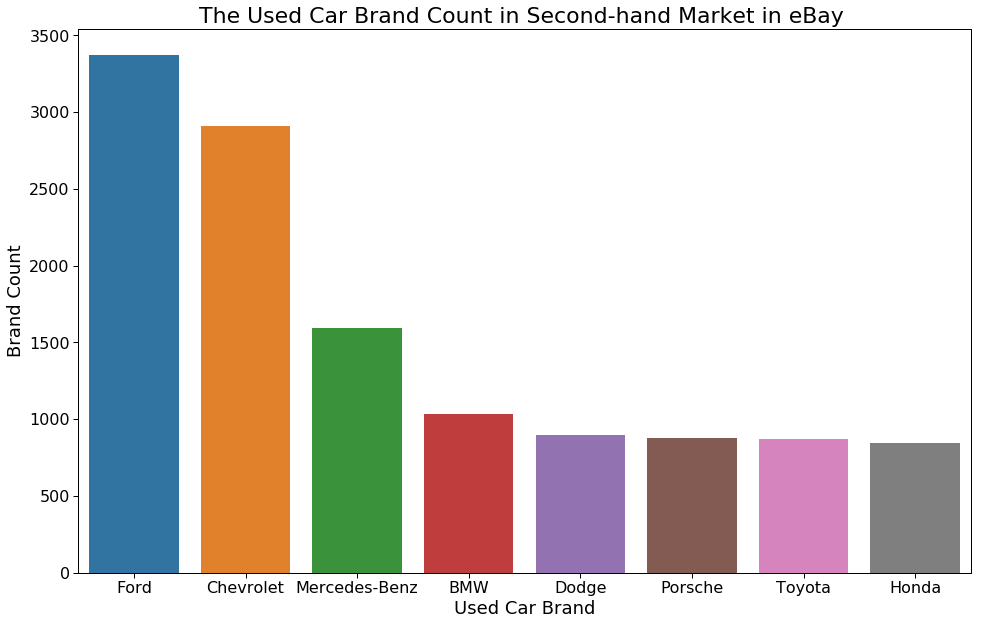

In [84]:
Frequency = info['make'].value_counts()
freq = info.groupby('make').count()
freq['count'] = Frequency
freq = freq.sort_values(by='count', ascending=False)[0:8]
freq = freq.reset_index()
plt.figure(figsize=(16, 10))
ax = sns.barplot("make","count",data = freq)
ax.set_title("The Used Car Brand Count in Second-hand Market in eBay ", fontsize = 22)
plt.xlabel('Used Car Brand', fontsize=18)
plt.ylabel('Brand Count', fontsize=18)

fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=16)

plt.savefig("1.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


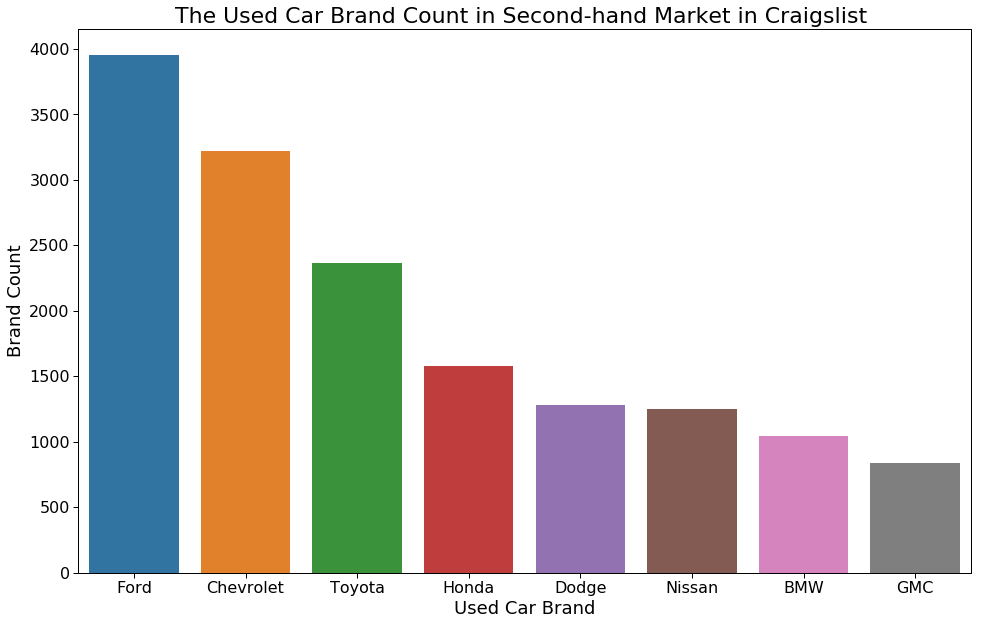

In [86]:
Frequency = craig['make'].value_counts()
freq = craig.groupby('make').count()
freq['count'] = Frequency
freq = freq.sort_values(by='count', ascending=False)[0:8]
freq = freq.reset_index()
plt.figure(figsize=(16, 10))
ax = sns.barplot("make","count",data = freq)
ax.set_title("The Used Car Brand Count in Second-hand Market in Craigslist ", fontsize = 22)
plt.xlabel('Used Car Brand', fontsize=18)
plt.ylabel('Brand Count', fontsize=18)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("a.png",format = "png")

In [87]:
def mean(x):
    y = sum(x)/len(x)
    return y

In [88]:
car_name =  ['Ford', 'Chevrolet', 'Mercedes-Benz,', 'BMW', 'Toyota', 'Jeep', 'Dodge',  'Porsche' ,'Honda']
indi = info["make"].isin(car_name)
car = info.loc[indi]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


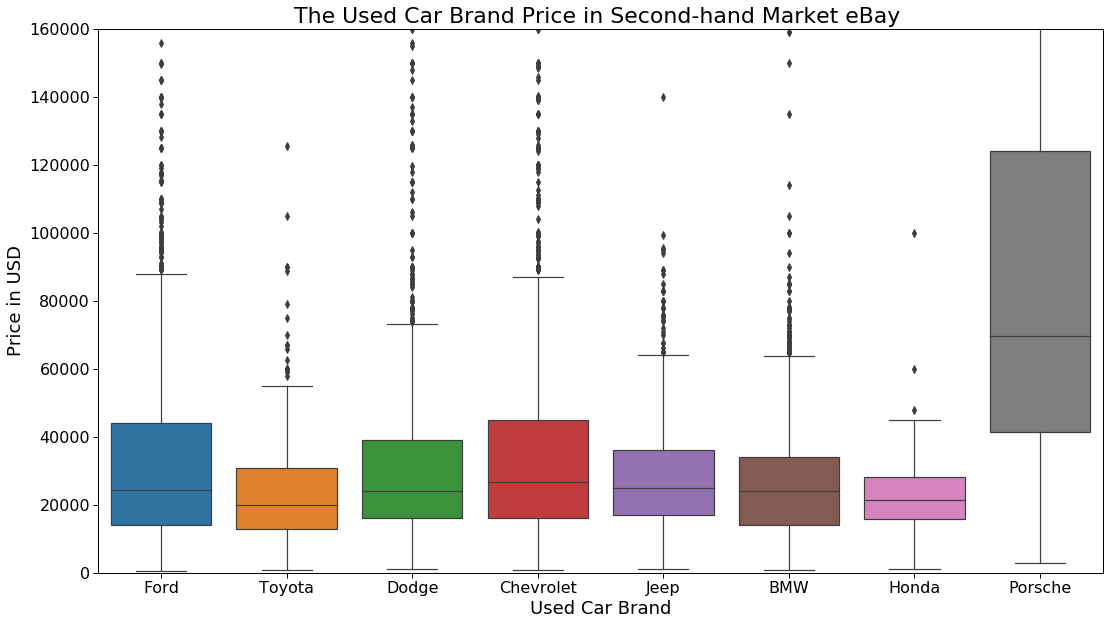

In [89]:
plt.figure(figsize = (18,10))
plt.ylim(0, 160000)
ax = sns.boxplot(x="make", y = "price", data = car)
ax.set_title("The Used Car Brand Price in Second-hand Market eBay ",fontsize= 22)
plt.xlabel('Used Car Brand', fontsize=18)
plt.ylabel('Price in USD', fontsize=18)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("2.png",format = "png")

In [90]:
car_name =  ['Ford', 'Chevrolet', 'Nissan,', 'BMW', 'Toyota', 'Jeep', 'Dodge',  'GMC' ,'Honda']
indi = craig["make"].isin(car_name)
car = craig.loc[indi]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


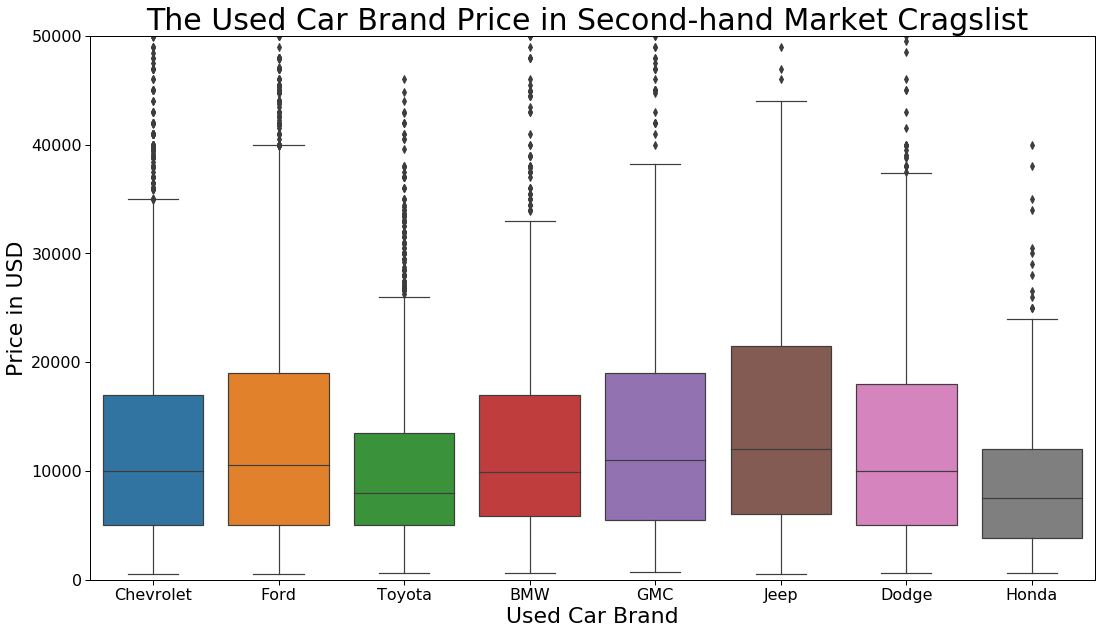

In [93]:
plt.figure(figsize = (18,10))
plt.ylim(0, 50000)
ax = sns.boxplot(x="make", y = "price", data = car)
ax.set_title("The Used Car Brand Price in Second-hand Market Cragslist ",fontsize= 30)
plt.xlabel('Used Car Brand', fontsize=22)
plt.ylabel('Price in USD', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("b.png",format = "png")

# 3.Which fuel type is the most popular? How does it related to price?

In [96]:
name = ('Gasoline', 'Flex Fuel Vehicle', 'Electric', 'Diesel',
'Hybrid-Electric')
indi = info["Fuel_type"].isin(name)
fuel = info.loc[indi]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


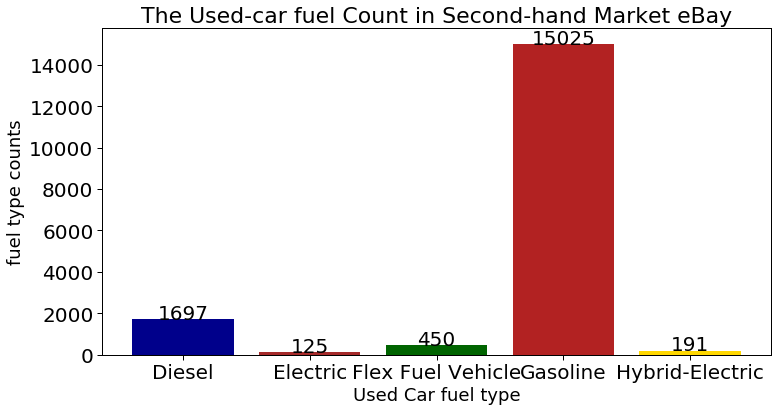

In [106]:
Frequency = fuel['Fuel_type'].value_counts()
freq = fuel.groupby('Fuel_type').count()
freq['count'] = Frequency
freq = freq.reset_index()
freq
plt.figure(figsize=(12, 6))
ax = sns.barplot("Fuel_type","count",data = freq)
ax.set_title("The Used-car fuel Count in Second-hand Market eBay",fontsize= 22)
plt.xlabel('Used Car fuel type', fontsize=18)
plt.ylabel('fuel type counts', fontsize=18)

x = ("Diesel","Electric","Flex Fuel Vehicle","Gasoline", "Hybrid-Electric")
y = (1697,125,450,15025,191)
plt.bar(x, y,color=['darkblue', 'brown', 'darkgreen', 'firebrick','gold'])

for a,b in zip(x, y):
    ax.text(a, b, str(b),ha='center',fontsize =20)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("3.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


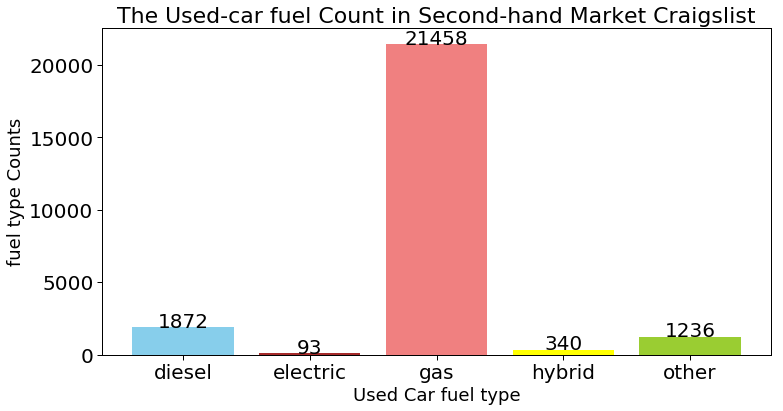

In [100]:
Frequency = craig['fuel'].value_counts()
freq = craig.groupby('fuel').count()
freq['count'] = Frequency
freq = freq.reset_index()
freq
plt.figure(figsize=(12, 6))
ax = sns.barplot("fuel","count",data = freq)
ax.set_title("The Used-car fuel Count in Second-hand Market Craigslist",fontsize =22)
plt.xlabel('Used Car fuel type', fontsize=18)
plt.ylabel('fuel type Counts', fontsize=18)

x = ("diesel","electric","gas","hybrid", "other")
y = (1872,93,21458,340,1236)
plt.bar(x, y,color=['skyblue', 'brown', 'lightcoral', 'yellow','yellowgreen'])

for a,b in zip(x, y):
    ax.text(a, b, str(b),ha='center',fontsize= 20)

fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)
    
plt.savefig("c.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


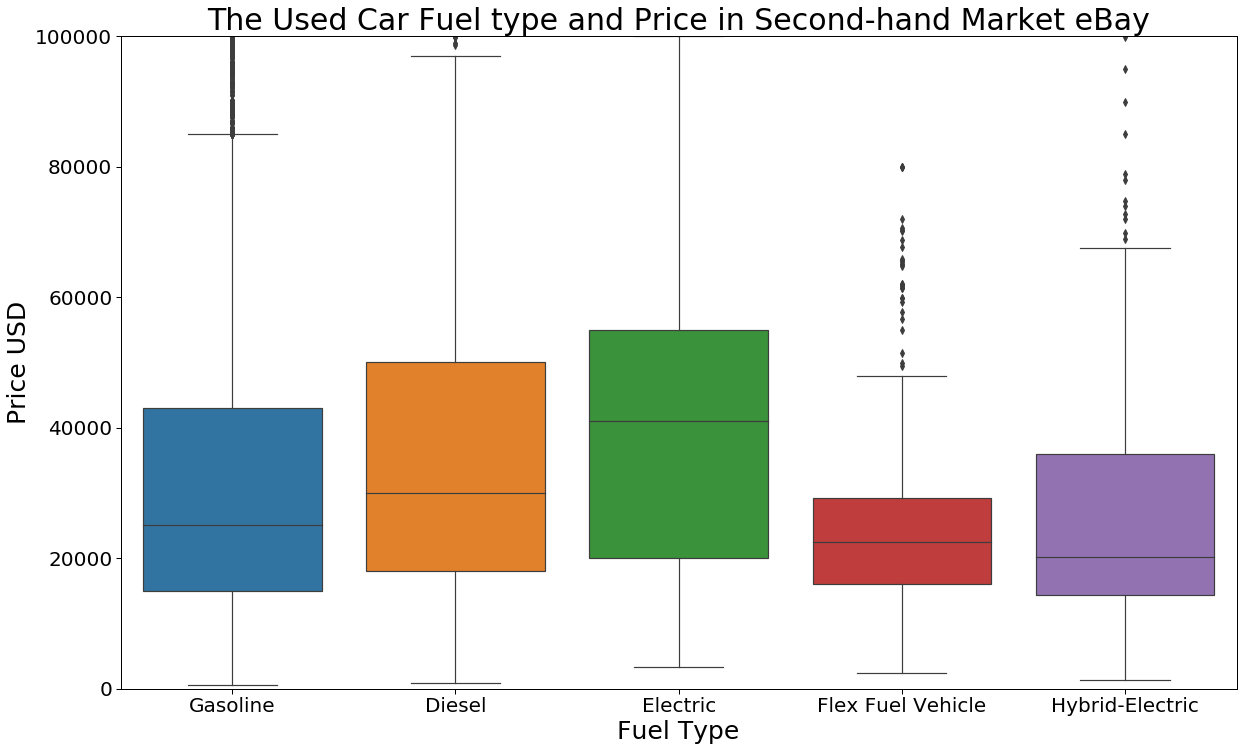

In [120]:
plt.figure(figsize = (20,12))
plt.ylim(0, 100000)
ax = sns.boxplot(x="Fuel_type", y = "price", data = fuel)
ax.set_title("The Used Car Fuel type and Price in Second-hand Market eBay", fontsize =30)
plt.xlabel('Fuel Type', fontsize=25)
plt.ylabel('Price USD', fontsize=25)
sns.set_context("paper", rc={"axes.labelsize":36})


fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)


plt.savefig("4.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


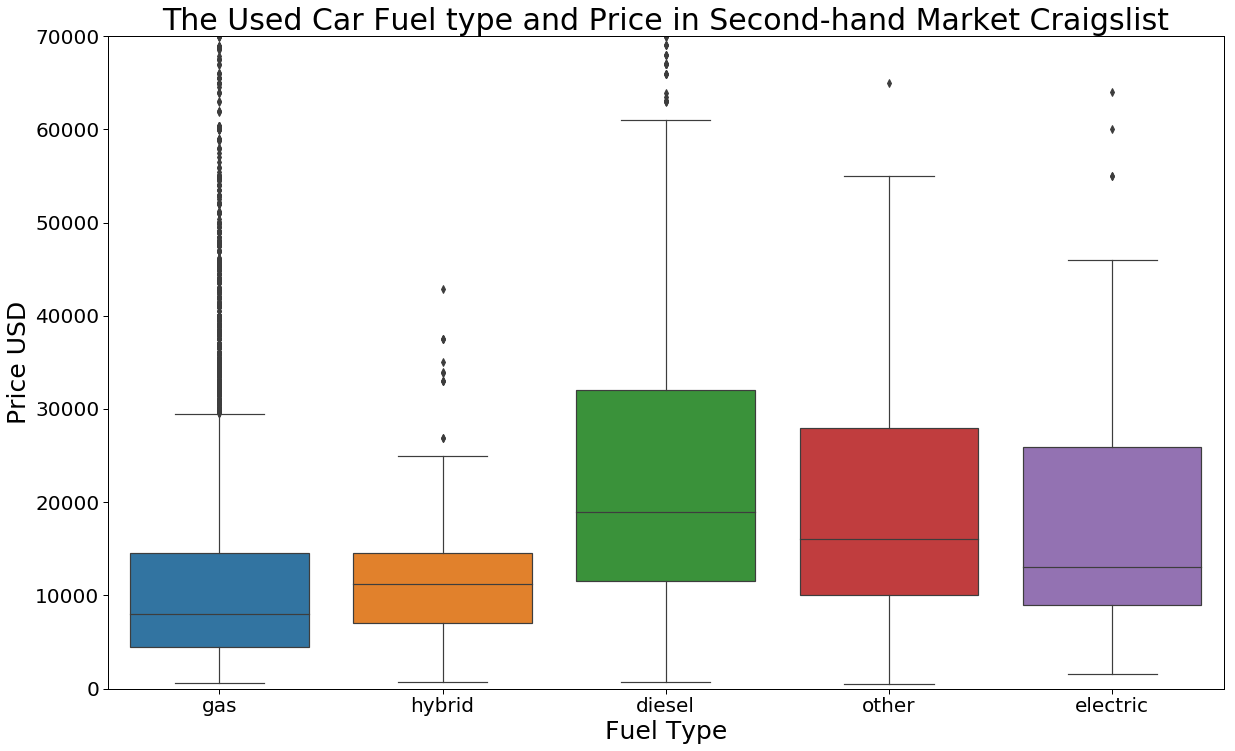

In [121]:
plt.figure(figsize = (20,12))
plt.ylim(0,70000)
ax = sns.boxplot(x="fuel", y = "price", data = craig)
ax.set_title("The Used Car Fuel type and Price in Second-hand Market Craigslist", fontsize =30)
plt.xlabel('Fuel Type', fontsize=25)
plt.ylabel('Price USD', fontsize=25)

fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)
# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("d.png",format = "png")



# 3. How does year related to the price?

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


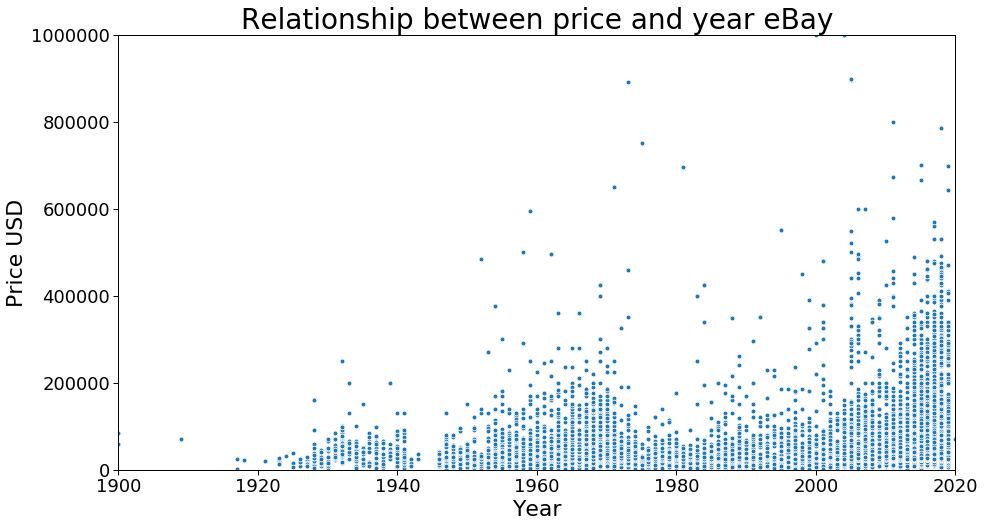

In [110]:
plt.figure(figsize = (15,8))
#change the size of the graph
plt.xlim(1900, 2020)
plt.ylim(0,1000000)
graph =sns.scatterplot(x=info["year"], y=info["price"])
graph.set_title("Relationship between price and year eBay", fontsize = 28)
                              
plt.xlabel('Year', fontsize=22)
plt.ylabel('Price USD', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=18)

plt.savefig("8.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


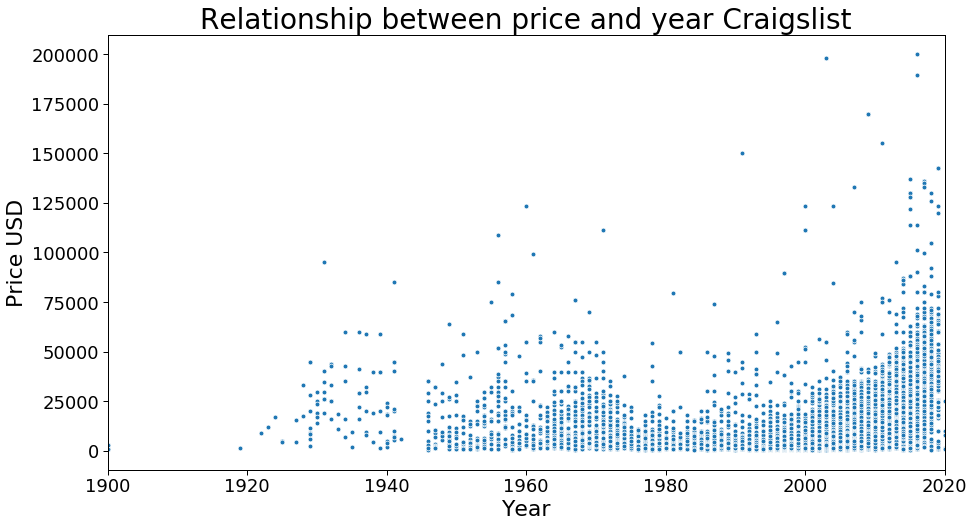

In [109]:
plt.figure(figsize = (15,8))
#change the size of the graph
plt.xlim(1900, 2020)
graph =sns.scatterplot(x=craig["year"], y=craig["price"])
graph.set_title("Relationship between price and year Craigslist", fontsize = 28)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Price USD', fontsize=22)

fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=18)

plt.savefig("g.png",format = "png")

# 5. What percentage of car in market is automatic? 

In [283]:
craig['transmission'].unique()

array(['automatic', 'manual', 'other', nan], dtype=object)

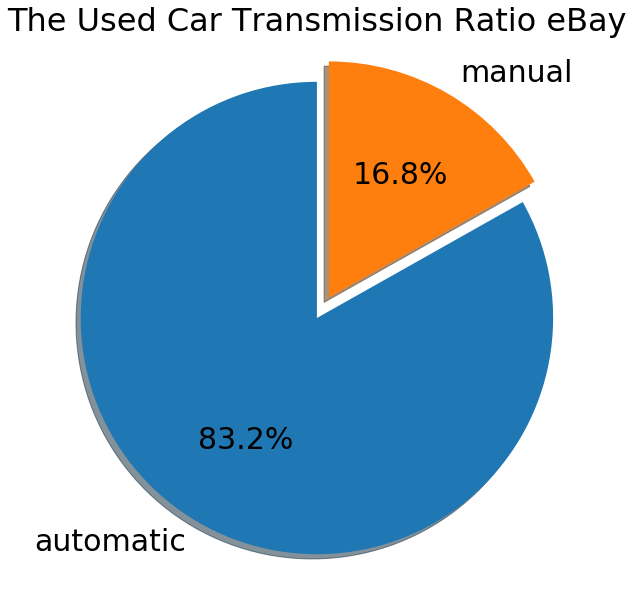

In [360]:
labels = ['automatic', 'manual']
sizes = [16095, 3258]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 30})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("The Used Car Transmission Ratio eBay",fontsize = 32)

plt.savefig("6.png",format = "png")


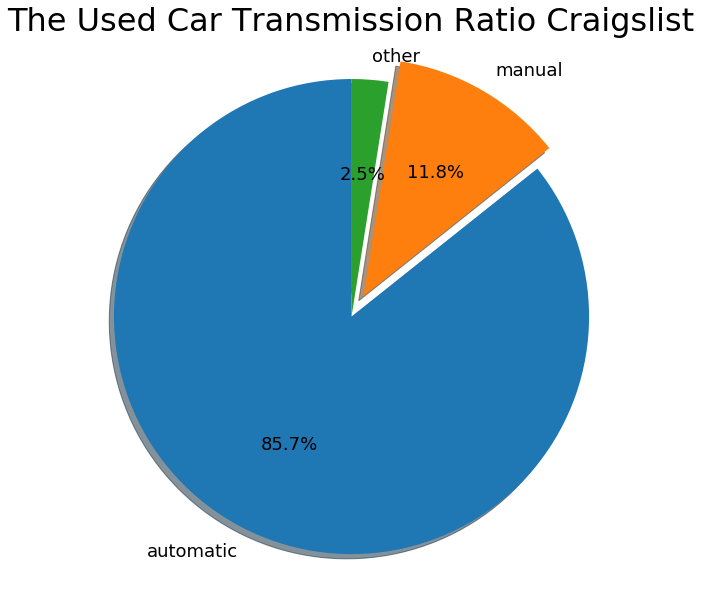

In [57]:
labels = ['automatic', 'manual', 'other']
sizes = [21355, 2942,621]
explode = (0, 0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("The Used Car Transmission Ratio Craigslist",fontsize = 32)

plt.savefig("h.png",format = "png")

# 6. How does mileage affect the price of car?

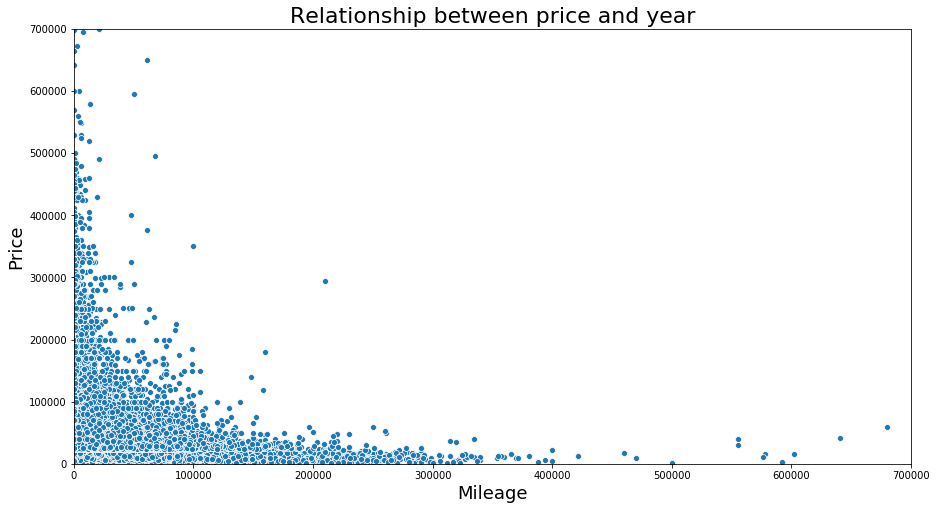

In [43]:
plt.figure(figsize = (15,8))
#change the size of the graph
plt.xlim(0,700000)
plt.ylim(0,700000)
graph =sns.scatterplot(x=info["mileage"], y=info["price"])
graph.set_title("Relationship between price and year",fontsize = 22)
plt.xlabel('Mileage', fontsize=18)
plt.ylabel('Price', fontsize=18)

plt.savefig("9.png",format = "png")

# 7.How number of  Automatic cars and Mannul cars change over time?

In [18]:
year_trans = info[['year','transmission']]
year_trans = year_trans.sort_values('year')
auto = year_trans.loc[year_trans['transmission']=='automatic']
auto = auto.reset_index()
auto = auto.drop('index',1)
auto = auto.groupby("year").aggregate(['count'])
auto1 = auto.reset_index()
auto1['new_count'] = auto1['transmission']['count']
auto = auto1.drop('transmission',1)
manual = year_trans.loc[year_trans['transmission']=='manual']
manual = manual.reset_index()
manual = manual.drop('index',1)
manual = manual.groupby("year").aggregate(['count'])
manual1 = manual.reset_index()
manual1['new_count'] = manual1['transmission']['count']
manual = manual1.drop('transmission',1)

In [19]:
auto = auto[23:93]
manual = manual[29:99]

In [20]:
data = pd.merge(auto, manual,on='year')
data = data.rename(columns = {'new_count_x':'auto','new_count_y':'manu'})

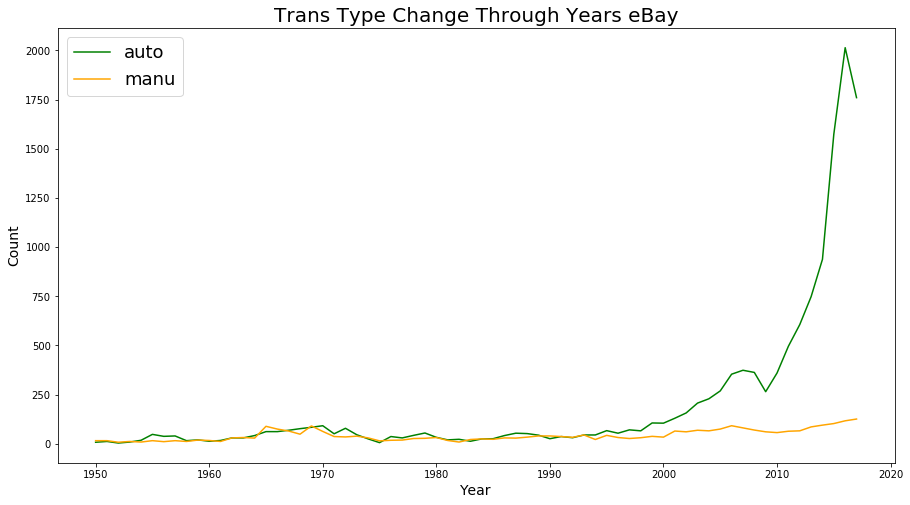

In [21]:
plt.figure(figsize = (15,8))
plt.plot(data['year'], data['auto'], color='g')
plt.plot(data['year'], data['manu'], color='orange')
plt.legend(['auto', 'manu'], loc='upper left',prop={'size': 18})
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Count',fontsize =
           14)
plt.title('Trans Type Change Through Years eBay',fontsize = 20)
plt.savefig("5.png",format = "png")

In [59]:
year_trans = craig[['year','transmission']]
year_trans = year_trans.sort_values('year')
auto = year_trans.loc[year_trans['transmission']=='automatic']
auto = auto.reset_index()
auto = auto.drop('index',1)
auto = auto.groupby("year").aggregate(['count'])
auto1 = auto.reset_index()
auto1['new_count'] = auto1['transmission']['count']
auto = auto1.drop('transmission',1)
manual = year_trans.loc[year_trans['transmission']=='manual']
manual = manual.reset_index()
manual = manual.drop('index',1)
manual = manual.groupby("year").aggregate(['count'])
manual1 = manual.reset_index()
manual1['new_count'] = manual1['transmission']['count']
manual = manual1.drop('transmission',1)

In [60]:
auto = auto[22:91]
manual = manual[24:93]

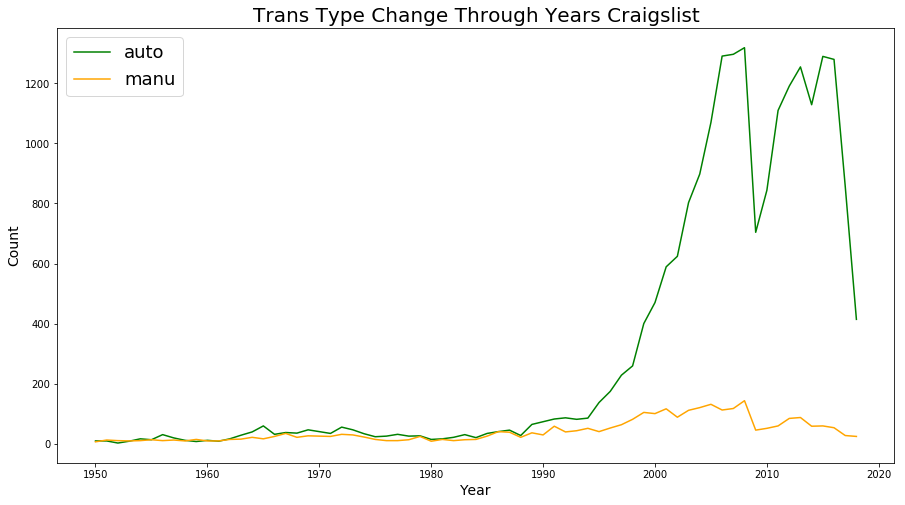

In [61]:
data = pd.merge(auto, manual,on='year')
data = data.rename(columns = {'new_count_x':'auto','new_count_y':'manu'})

plt.figure(figsize = (15,8))
plt.plot(data['year'], data['auto'], color='g')
plt.plot(data['year'], data['manu'], color='orange')
plt.legend(['auto', 'manu'], loc='upper left',prop={'size': 18})
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Count',fontsize =
           14)
plt.title('Trans Type Change Through Years Craigslist',fontsize = 20)
plt.savefig("h.png",format = "png")

# What's the most common body type, and how it affect price?

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


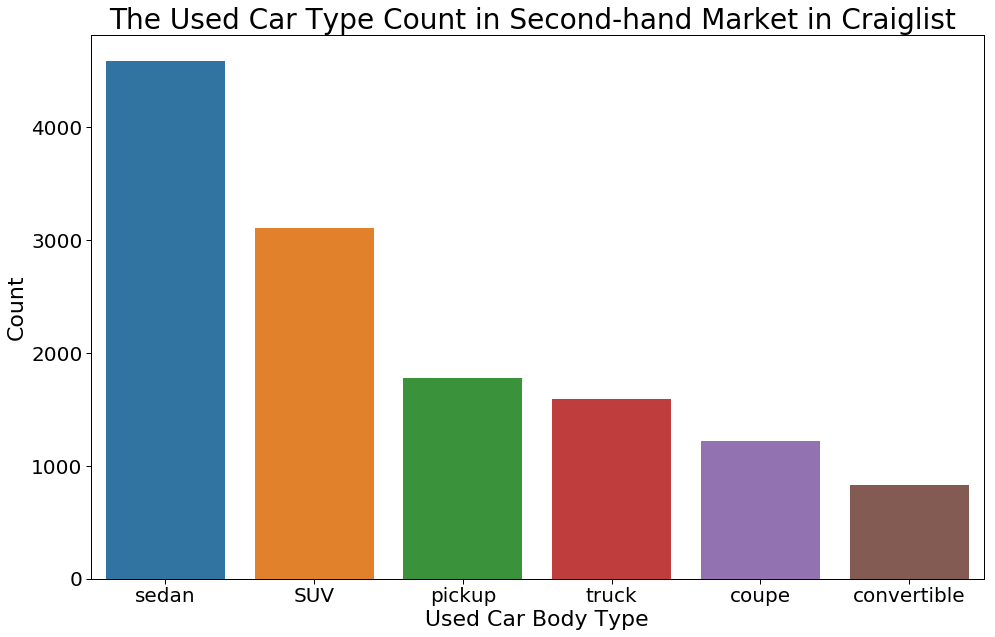

In [112]:
Frequency = craig['typetype'].value_counts()
freq = craig.groupby('typetype').count()
freq['count'] = Frequency
freq = freq.sort_values(by='count', ascending=False)[0:6]
freq = freq.reset_index()
plt.figure(figsize=(16, 10))
ax = sns.barplot("typetype","count",data = freq)
ax.set_title("The Used Car Type Count in Second-hand Market in Craiglist ", fontsize = 28)
plt.xlabel('Used Car Body Type', fontsize=22)
plt.ylabel('Count', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("u.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


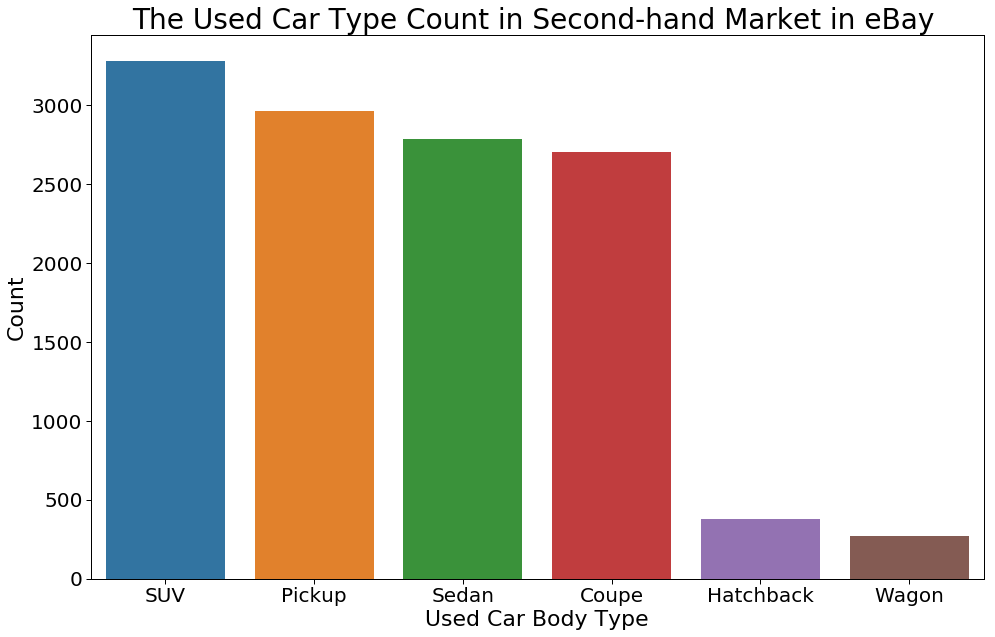

In [113]:
Frequency = info['body_type'].value_counts()
freq = info.groupby('body_type').count()
freq['count'] = Frequency
freq = freq.sort_values(by='count', ascending=False)
freq = freq.reset_index()
plt.figure(figsize=(16, 10))
ax = sns.barplot("body_type","count",data = freq)
ax.set_title("The Used Car Type Count in Second-hand Market in eBay ", fontsize = 28)
plt.xlabel('Used Car Body Type', fontsize=22)
plt.ylabel('Count', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("11.png",format = "png")

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


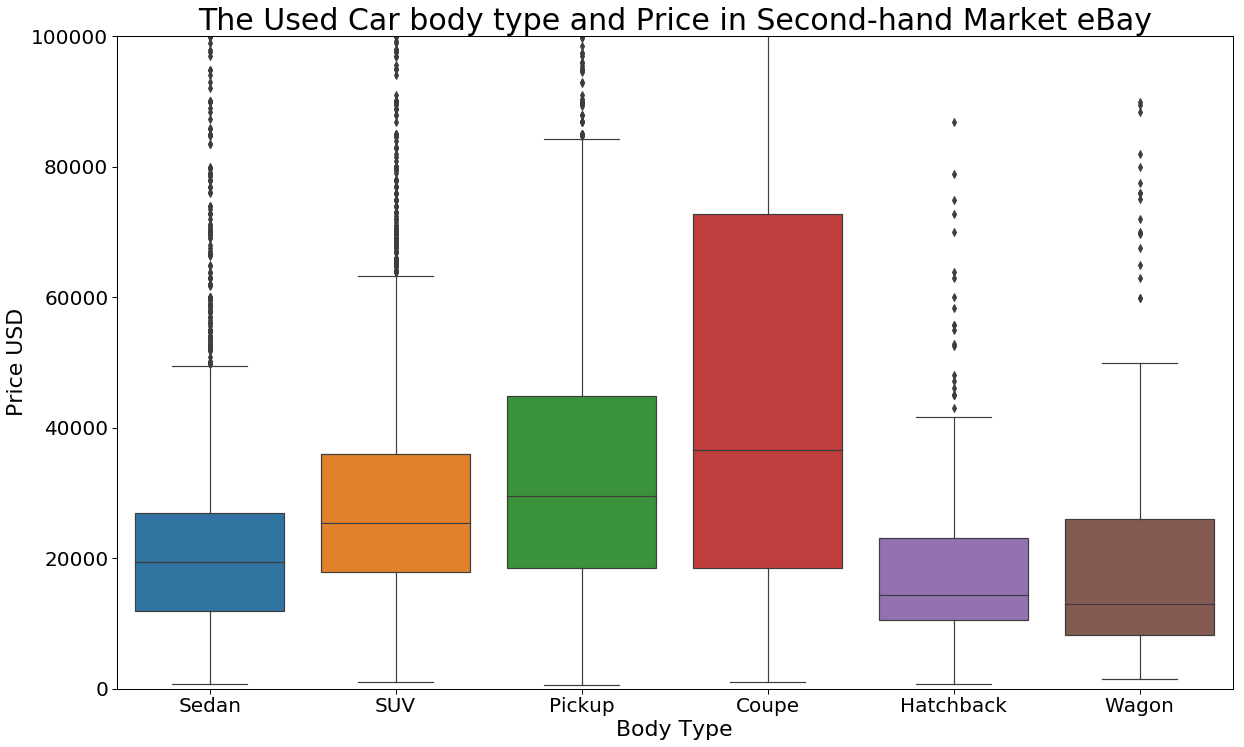

In [115]:
plt.figure(figsize = (20,12))
plt.ylim(0, 100000)
ax = sns.boxplot(x="body_type", y = "price", data = info)
ax.set_title("The Used Car body type and Price in Second-hand Market eBay", fontsize =30)
plt.xlabel('Body Type', fontsize=22)
plt.ylabel('Price USD', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("12.png",format = "png")

In [117]:
car_name =  ['sedan', 'SUV', 'pickup', 'truck', 'coupe', 'convertible']
indi = craig["typetype"].isin(car_name)
car = craig.loc[indi]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


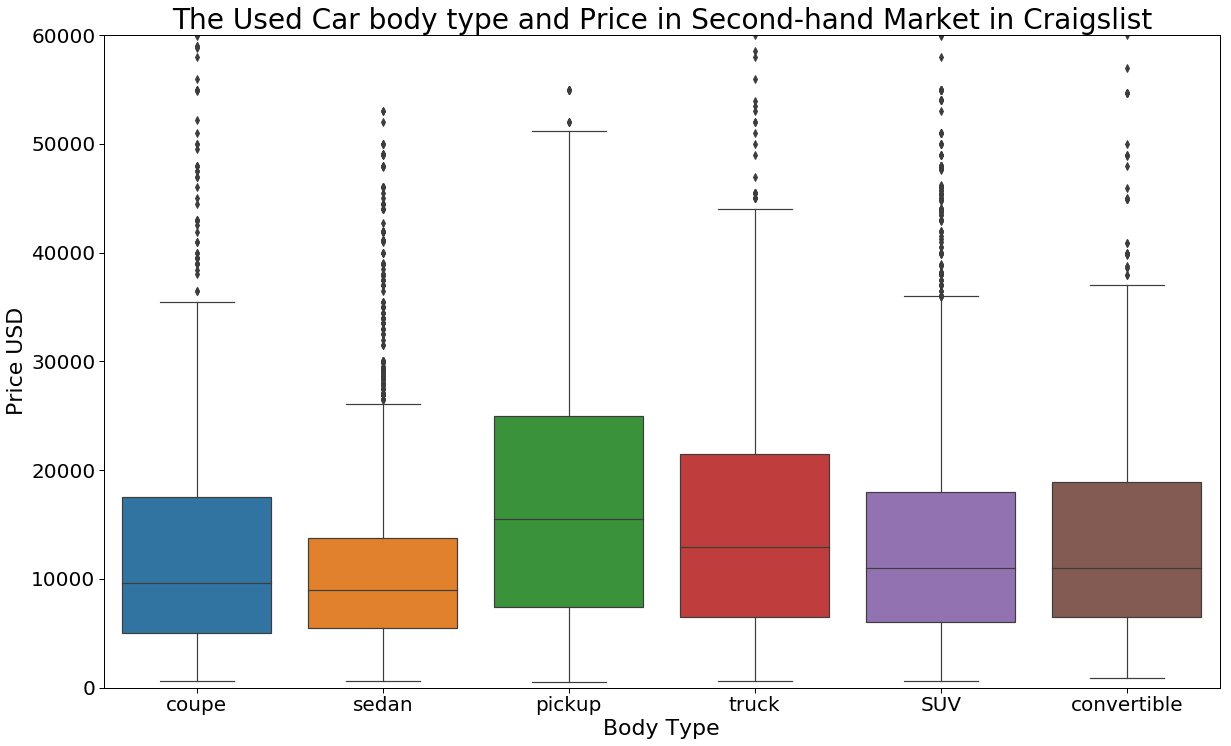

In [118]:
plt.figure(figsize = (20,12))
plt.ylim(0, 60000)
ax = sns.boxplot(x="typetype", y = "price", data = car)
ax.set_title("The Used Car body type and Price in Second-hand Market in Craigslist", fontsize =28)
plt.xlabel('Body Type', fontsize=22)
plt.ylabel('Price USD', fontsize=22)
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("w.png",format = "png")